# **Family Income, Entrepreneurship, and Social Mobility: A Double Machine Learning with Instrument Variable (DML-IV) Approach**

## 1. Introduction and Literature Review

This report builds upon the research of Lin et al. (2020), utilizing data from the 2017 Taiwan Social Change Survey, Phase 7, Wave 3: Social Stratification Module (Fu, 2023). We apply the Double Machine Learning (DML) framework and propose an appropriate instrumental variable to further investigate the influence of family income background and entrepreneurship on income mobility in Taiwanese society.

In their study, Lin et al. (2020) reviewed the relationship between family background and the entrepreneurial intentions of individuals. They note that family education plays a significant role in shaping young people’s motivation to pursue entrepreneurship, and several studies have pointed out that men tend to have a higher inclination toward entrepreneurship than women.

In the context of Taiwanese society, they observed a shift in the socioeconomic profile of entrepreneurs: modern entrepreneurs are more likely to come from middle- to high-income families, replacing earlier generations who often turned to entrepreneurship out of economic necessity. This is especially relevant in Taiwan, where initial funding for entrepreneurial ventures often comes from family and close social networks, which are more accessible to individuals from more privileged backgrounds. Prior literature also supports the notion that previous work experience and social connections substantially contribute to entrepreneurial motivation.

At the individual level, factors such as dissatisfaction with current conditions (e.g., income, job frustration, long working hours) and personal aspirations (e.g., self-fulfillment, social responsibility, market opportunity) also serve as key drivers of entrepreneurship.

In addition, the study also examined whether entrepreneurship functions as an effective channel for income mobility, as often emphasized by scholars and policy makers. Lin et al. (2020) discussed whether entrepreneurship truly mitigates intergenerational income persistence, as is commonly expected in policy discourse.

## **2. Research Question and Methods**

This report builds upon one of the key research questions addressed by Lin et al. (2020), extending their analysis by explicitly investigating the causal effect.
The central question of this report is: What is the causal effect of entrepreneurship on intergenerational income mobility?

Based on the preceding literature review and theoretical considerations, we construct a model using Double Machine Learning (DML) to estimate this causal relationship.


### **Model Design**


The variables used in the model are as follows. In order to assess the causal effect of entrepreneurship on income strata, we simultaneously consider the following components:
* $X$ represents the set of control variables, including:
  * Respondent’s age
  * Gender
  * Years of education
  * Father’s occupational type
  * Region of residence (categorized as metropolitan core, industrial/commercial urban area, emerging towns, traditional industrial towns, underdeveloped rural areas, or aging remote areas)
* $Y$ is the individual’s current income stratum at the time of the survey
* $T_1$ is a binary indicator for entrepreneurship (entrepreneur vs. non-entrepreneur)
* $T_2$ represents the income stratum of the respondent’s family during childhood
* $Z_1$ is the instrumental variable used in the model:
  * Father’s level of education

The model structure and corresponding causal diagram are as follows:


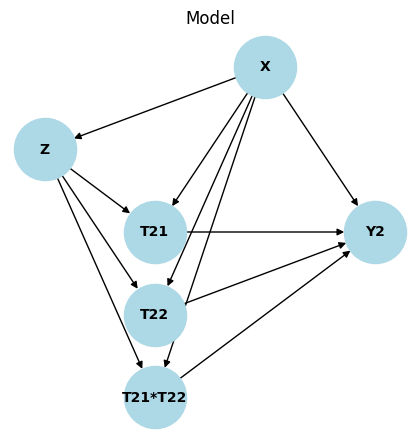

In [120]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

a = 'X'
b = 'Y2'
c = 'T21'
d = 'Z'
e = 'T22'
f = 'T21*T22'

nodes = [a,b,c,d,e,f]
G.add_nodes_from(nodes)
edges = [(a,b),(a,c),(a,d),(a,e),(a,f),(c,b),(e,b),(f,b),(d,c),(d,e),(d,f)]
G.add_edges_from(edges)

pos = {a: (1, 2), b: (2, 1), c: (0, 1), d:(-1,1.5), e:(0,0.5), f:(0,0)}

plt.figure(figsize=(4, 4))

nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')

node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Model")
plt.axis('off')

plt.show()

## **3. Data Processing**

### **(i) Data Import and Cleaning**

The dataset used in this study is from the 2017 Taiwan Social Change Survey (Phase 7, Wave 3: Social Stratification Module).
As the original data are only available in STATA (.dta) and SPSS formats, most of the data cleaning was completed in STATA to streamline the workflow. Only the cleaned and relevant variables were imported into the analysis.

In [121]:
import pandas as pd
df = pd.read_csv('TSCS2017_cleaned.csv')
df.head()

,stratum2,f_job,age,edu,strata_young,strata_current,is_entrepreneur,f_edu,trust,health,happy,worktime,gender,income
0,新興市鎮,自行創業,67,6.0,3.0,1.0,0.0,NaN,0.0,2.0,2.0,6.0,0,6.0
1,新興市鎮,NaN,69,6.0,2.0,3.0,0.0,0.0,1.0,4.0,2.0,NaN,0,NaN
2,傳統產業市鎮,自行創業,52,14.0,4.0,4.0,1.0,6.0,3.0,3.0,2.0,7.0,1,9.0
3,工商市區,自行創業,41,12.0,3.0,3.0,1.0,6.0,1.0,2.0,3.0,7.0,1,0.0
4,傳統產業市鎮,NaN,64,9.0,1.0,1.0,0.0,NaN,NaN,4.0,1.0,5.0,0,6.0


In [122]:
df = df.dropna().reset_index(drop = True)
df.head()

,stratum2,f_job,age,edu,strata_young,strata_current,is_entrepreneur,f_edu,trust,health,happy,worktime,gender,income
0,傳統產業市鎮,自行創業,52,14.0,4.0,4.0,1.0,6.0,3.0,3.0,2.0,7.0,1,9.0
1,工商市區,自行創業,41,12.0,3.0,3.0,1.0,6.0,1.0,2.0,3.0,7.0,1,0.0
2,傳統產業市鎮,自行創業,61,9.0,2.0,3.0,0.0,6.0,1.0,2.0,3.0,5.0,0,7.0
3,傳統產業市鎮,自行創業,67,6.0,3.0,3.0,0.0,0.0,1.0,3.0,1.0,4.0,1,6.0
4,傳統產業市鎮,自行創業,62,6.0,3.0,2.0,1.0,0.0,0.0,3.0,2.0,2.0,1,4.0


In [123]:
df.shape

(1012, 14)

In [124]:
temp = pd.get_dummies(df[['stratum2','f_job']], dtype = float)
df = pd.concat([df, temp], axis=1)
df.head()

,stratum2,f_job,age,edu,strata_young,strata_current,is_entrepreneur,f_edu,trust,health,...,income,stratum2_低度發展鄉鎮,stratum2_傳統產業市鎮,stratum2_工商市區,stratum2_新興市鎮,stratum2_都會核心,f_job_公部門,f_job_無工作,f_job_私部門,f_job_自行創業
0,傳統產業市鎮,自行創業,52,14.0,4.0,4.0,1.0,6.0,3.0,3.0,...,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,工商市區,自行創業,41,12.0,3.0,3.0,1.0,6.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,傳統產業市鎮,自行創業,61,9.0,2.0,3.0,0.0,6.0,1.0,2.0,...,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,傳統產業市鎮,自行創業,67,6.0,3.0,3.0,0.0,0.0,1.0,3.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,傳統產業市鎮,自行創業,62,6.0,3.0,2.0,1.0,0.0,0.0,3.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### (ii) Instrumental Variable Validation

A valid instrumental variable must satisfy two key conditions: relevance and exogeneity.
In this context, *relevance* requires that the instrument be sufficiently correlated with the treatment variable $T$ in both models.
*Exogeneity* implies that the instrument must be uncorrelated with the error term in the outcome equation.

In [125]:
Controls = ['stratum2_低度發展鄉鎮', 'stratum2_傳統產業市鎮', 'stratum2_新興市鎮', 'stratum2_工商市區', 'stratum2_都會核心',
     'f_job_公部門','f_job_私部門', 'f_job_自行創業', 'f_job_無工作','age','edu','gender']
Y1 = 'strata_current'
T1 = 'strata_young'
T2 = 'is_entrepreneur'
Z = 'f_edu'

In [126]:
import statsmodels.api as sm

X = sm.add_constant(df[['f_edu'] + Controls])  # instrument + controls
y = df[T1]

first_stage = sm.OLS(y, X).fit()
print(first_stage.summary())


                            OLS Regression Results                            
Dep. Variable:           strata_young   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     14.17
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           1.24e-25
Time:                        19:37:24   Log-Likelihood:                -1363.1
No. Observations:                1012   AIC:                             2750.
Df Residuals:                    1000   BIC:                             2809.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0172      0.157     

In [127]:
import statsmodels.api as sm

X = sm.add_constant(df[['f_edu'] + Controls])  # instrument + controls
y = df[T2]

first_stage = sm.OLS(y, X).fit()
print(first_stage.summary())

                            OLS Regression Results                            
Dep. Variable:        is_entrepreneur   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     9.234
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           6.47e-16
Time:                        19:37:24   Log-Likelihood:                -411.98
No. Observations:                1012   AIC:                             848.0
Df Residuals:                    1000   BIC:                             907.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0558      0.061     

#### **Conclusion**
##### **Relevance**
We use father’s education (`f_edu`) as an instrument under the assumption that it is correlated with entrepreneurial decisions (`T1`). The empirical results show that this correlation is marginally significant, suggesting that f_edu may influence an individual's likelihood of becoming an entrepreneur, though the strength of the relationship is modest.

This marginal significance is theoretically justifiable: higher parental education could shape attitudes toward risk, career aspirations, or access to informal support — all of which may subtly affect entrepreneurship choices. Additionally, f_edu shows some correlation with strata_young (early family income class), supporting its use in modeling background socioeconomic status.

Although not strongly predictive, the nonzero association between f_edu and T1 satisfies the relevance condition in an instrumental variable framework, particularly when used in combination with machine learning methods that account for flexible relationships and high-dimensional controls.


##### **Exogeneity**
The critical assumption is that `f_edu` affects the child’s income class only through its impact on entrepreneurship — not through any other direct or unobserved channels.

We argue this is plausible under the following conditions:

* We include a rich set of control variables: the individual’s own education,
age, gender, and region fixed effects. These absorb much of the direct influence of parental background on income.

* We focus on a contemporary income outcome (strata_current) influenced by current labor market behavior, which should be less directly impacted by parental education once personal characteristics are controlled.

* In many social settings (e.g., Taiwan), intergenerational mobility is high, and the direct effect of parental education on adult income — beyond early life investments and values — is mediated through the child’s own achievements, which we control for.

##### **Caveats**

Although key covariates such as age, gender, own educational attainment, and region of employment are included to mitigate potential confounding, there remain plausible pathways through which parental education may directly influence adult income outcomes beyond the channel of entrepreneurship. For instance, higher parental education is often associated with greater social capital, broader professional networks, and early exposure to cognitive and cultural resources—all of which may independently affect an individual’s career trajectory and earnings potential.

As such, while the instrument is likely relevant (i.e., correlated with the endogenous regressor), the exclusion restriction may be partially violated. The results should therefore be interpreted with caution, acknowledging that the causal estimates may be biased if these alternative pathways are not fully accounted for.

## (3) Selection of Machine Learning Models

The candidate machine learning models include: Linear Regression, Lasso Regression, Ridge Regression, SVR, Decision Tree, Random Forest Regression, and Gradient Boosting Regression.
We use Mean Squared Error (MSE) as the evaluation metric to assess the default performance of each model. The best-performing model is then further fine-tuned through parameter optimization.

According to the official documentation of DoubleML (https://docs.doubleml.org/stable/api/generated/doubleml.DoubleMLPLIV.html), a model with instrumental variables requires specifying three machine learning models, each responsible for estimating one of the following nuisance functions:
1.	ml_l: $\ell_0(X) = E[Y | X]$
2.	ml_m: $m_0(X) = E[Z | X]$
3.	ml_r: $r_0(X) = E[D | X]$

Therefore, our first step is to identify the most suitable model for each of these three components.

##### Selecting `ml_l` model:

In [130]:
Controls = ['stratum2_低度發展鄉鎮', 'stratum2_傳統產業市鎮', 'stratum2_新興市鎮', 'stratum2_工商市區', 'stratum2_都會核心',
     'f_job_公部門','f_job_私部門', 'f_job_自行創業', 'f_job_無工作','age','edu','gender']
Y1 = 'strata_current'
T1 = 'strata_young'
T2 = 'is_entrepreneur'
Z1 = ['f_edu']
df['T1T2'] = df[T1]*df[T2]

In [131]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

Y = df[Y1]
X = df[Controls]

models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

model_names = [
    "Linear Regression",
    "Lasso Regression",
    "Ridge Regression",
    "Support Vector Regression",
    "Decision Tree Regression",
    "Random Forest Regression",
    "Gradient Boosting Regression"
]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model, name in zip(models, model_names):
    mse_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        model.fit(X_train, Y_train)  # 訓練模型
        Y_pred = model.predict(X_test)  # 預測
        mse = mean_squared_error(Y_test, Y_pred)  # 計算 MSE
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)  # 計算平均 MSE
    print(f"{name} Average MSE: {avg_mse}")

Linear Regression Average MSE: 0.6108475082627703
Lasso Regression Average MSE: 0.6855060303568834
Ridge Regression Average MSE: 0.6106899115807071
Support Vector Regression Average MSE: 0.6649528268967251
Decision Tree Regression Average MSE: 1.3112758566497045
Random Forest Regression Average MSE: 0.7922120411513991
Gradient Boosting Regression Average MSE: 0.6638131584991781


Lasso Regressor is the best-performing model. To tune its parameters, we first identify an appropriate parameter range, and then proceed with finer adjustments

In [132]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# 初始化 Lasso Regressor
lasso = Lasso()

# 使用 GridSearchCV 尋找最佳參數
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# 印出最佳參數
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.01}


In [133]:
param_grid = {
    'alpha': np.arange(0.001, 0.011, 0.01)
}

# 初始化 Lasso Regressor
lasso = Lasso()

# 使用 GridSearchCV 尋找最佳參數
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# 印出最佳參數
print("Best Parameters:", grid_search.best_params_['alpha'])

Best Parameters: 0.001


In [134]:
ml_l_lasso = Lasso(alpha=0.001)

# MSE
ml_l_lasso.fit(X, Y)
Y_hat = ml_l_lasso.predict(X)
mse_lasso = mean_squared_error(Y, Y_hat)
print("Lasso Regression MSE with best parameter:", mse_lasso)

Lasso Regression MSE with best parameter: 0.5981209331801444


##### Selecting `ml_m` model:

In [135]:
from sklearn.multioutput import MultiOutputRegressor
X = df[Controls]
Y = pd.concat([df[T1], df[T2], df['T1T2']], axis=1)

models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    MultiOutputRegressor(SVR()),
    MultiOutputRegressor(DecisionTreeRegressor()),
    MultiOutputRegressor(RandomForestRegressor()),
    MultiOutputRegressor(GradientBoostingRegressor())
]

for model, name in zip(models, model_names):
    mse_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        model.fit(X_train, Y_train)  # 訓練模型
        Y_pred = model.predict(X_test)  # 預測
        mse = mean_squared_error(Y_test, Y_pred)  # 計算 MSE
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)  # 計算平均 MSE
    print(f"{name} Average MSE: {avg_mse}")

Linear Regression Average MSE: 0.7965795377367939
Lasso Regression Average MSE: 0.830752778129144
Ridge Regression Average MSE: 0.796337756751414
Support Vector Regression Average MSE: 0.8864706687451852
Decision Tree Regression Average MSE: 1.635910948442956
Random Forest Regression Average MSE: 0.9547306928666721
Gradient Boosting Regression Average MSE: 0.8405712005122783


整體而言，Ridge的表現最佳，調整參數：

In [136]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# 初始化 Lasso Regressor
ridge = Ridge()

# 使用 GridSearchCV 尋找最佳參數
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# 印出最佳參數
print("Best Parameters:", grid_search.best_params_['alpha'])

Best Parameters: 100


按照大致範圍，繼續搜索具體的最佳參數

In [137]:
param_grid = {
    'alpha': range(50,300,1)
}

# 初始化 Lasso Regressor
ridge = Ridge()

# 使用 GridSearchCV 尋找最佳參數
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# 印出最佳參數
print("Best Parameters:", grid_search.best_params_['alpha'])

Best Parameters: 70


...再進一步細調

In [138]:
param_grid = {
    'alpha': np.arange(70,80,0.1)
}

# 初始化 Lasso Regressor
ridge = Ridge()

# 使用 GridSearchCV 尋找最佳參數
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# 印出最佳參數
print("Best Parameters:", grid_search.best_params_['alpha'])

Best Parameters: 70.1


In [139]:
ml_m_ridge = Ridge(alpha=70.1)

# MSE
ml_m_ridge.fit(X, Y)
Y_hat = ml_m_ridge.predict(X)
mse_lasso = mean_squared_error(Y, Y_hat)
print("Ridge Regression MSE with best parameter:", mse_lasso)

Ridge Regression MSE with best parameter: 0.7788104471540026


##### Selecting `ml_r` model:

In [140]:
from sklearn.multioutput import MultiOutputRegressor
X = df[Controls]
Y = df['f_edu']

models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

for model, name in zip(models, model_names):
    mse_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        model.fit(X_train, Y_train)  # 訓練模型
        Y_pred = model.predict(X_test)  # 預測
        mse = mean_squared_error(Y_test, Y_pred)  # 計算 MSE
        mse_scores.append(mse)

    avg_mse = np.mean(mse_scores)  # 計算平均 MSE
    print(f"{name} Average MSE: {avg_mse}")

Linear Regression Average MSE: 10.854860112279118
Lasso Regression Average MSE: 11.99122943300722
Ridge Regression Average MSE: 10.851700766521551
Support Vector Regression Average MSE: 12.528115630682663
Decision Tree Regression Average MSE: 22.061503194654442
Random Forest Regression Average MSE: 12.762236157315069
Gradient Boosting Regression Average MSE: 10.776244075329615


Overall, GBR has the best performance under default parameters.

In [141]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    # Add other parameters you want to tune
}

# 初始化 Lasso Regressor
gbr = GradientBoostingRegressor()

# 使用 GridSearchCV 尋找最佳參數
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# 印出最佳參數
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [142]:
ml_r_gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=200)

# MSE
ml_r_gbr.fit(X, Y)
Y_hat = ml_r_gbr.predict(X)
mse_gbr = mean_squared_error(Y, Y_hat)
mse_gbr

7.76206579235809

### **4. Double Machine Learning!**

Plug the models into DMLIV of `doubleml` package.


In [143]:
!pip install doubleml -q

In [147]:
Controls = ['stratum2_低度發展鄉鎮', 'stratum2_傳統產業市鎮', 'stratum2_新興市鎮', 'stratum2_工商市區', 'stratum2_都會核心',
     'f_job_公部門','f_job_私部門', 'f_job_自行創業', 'f_job_無工作','age','edu','gender']
Y1 = 'strata_current'
T1 = 'strata_young'
T2 = 'is_entrepreneur'
Z = 'f_edu'
df['T1T2'] = df[T1]*df[T2]

In [148]:
import doubleml as dml
obj_dml_data = dml.DoubleMLData(df,
                                y_col = Y1,
                                d_cols = [T1,T2,'T1T2'],
                                x_cols = Controls,
                                z_cols= [Z])

dml_pliv_obj = dml.DoubleMLPLIV(obj_dml_data, ml_l = ml_l_lasso, ml_m = ml_m_ridge, ml_r = ml_r_gbr)

dml_pliv_obj.fit().summary

,coef,std err,t,P>|t|,2.5 %,97.5 %
strata_young,5.365935e-01,1.780782e-01,3.013247,0.002585,1.875667e-01,8.856203e-01
is_entrepreneur,-2.710249e+08,5.244927e+08,-0.516737,0.605340,-1.299012e+09,7.569618e+08
T1T2,5.540026e+08,2.576934e+09,0.214985,0.829779,-4.496695e+09,5.604700e+09


## **5. Conclusion and Discussion**

Building on the work of Lin et al. (2020), this report applies a Double Machine Learning (DoubleML) framework incorporating a instrumental variable to further examine one of the study’s key questions: how entrepreneurship and family income background affect intergenerational income mobility, and to estimate their potential causal effects.

From the DoubleML results, we observe that the coefficient for strata_young is statistically significant at the 95% confidence level (p = 0.0026), indicating a robust positive causal effect of early-life income strata on current income strata. This aligns with the findings of Lin et al. (2020), supporting the idea that individuals from higher-income backgrounds are more likely to remain in higher strata in adulthood—a reflection of class reproduction.

However, the results for entrepreneurship (is_entrepreneur) and the interaction term (represented here as T1T2) are notably different from Lin et al.’s findings. In the original study, entrepreneurship was found to have a positive effect on income mobility, suggesting that entrepreneurship could disrupt intergenerational income persistence. Additionally, the interaction between family background and entrepreneurship was reported as negative, implying that entrepreneurship could be particularly beneficial for those from lower-income backgrounds.

In contrast, the DoubleML results presented here show that:
	•	The entrepreneurship effect is statistically insignificant (p = 0.605), and
	•	The interaction term (T1T2) is also insignificant (p = 0.829)

This suggests that, when accounting for potential endogeneity using the IV-DML framework, entrepreneurship does not have a significant causal effect on current income strata. Moreover, there is no evidence to support the idea that entrepreneurship mitigates the effects of early-life income advantage. On the contrary, the significance of strata_young alone indicates that the effects of early advantage persist, regardless of entrepreneurial status.

These findings challenge the optimistic view in Lin et al. (2020) that entrepreneurship promotes income mobility. Instead, they suggest that income advantages in youth remain a powerful determinant of adult income, even among those who become entrepreneurs.



## 6. Reference

林祖嘉、李明軒、林姵宜（2020）。家庭所得階層對創業決策影響之研究－臺灣社會變遷調查資料的實證分析。人文及社會科學集刊，32(1)，39-79。https://www.airitilibrary.com/Article/Detail?DocID=1018189X-202003-202004270003-202004270003-39-79

傅仰止(2023)。臺灣社會變遷基本調查計畫2017第七期第三次：社會階層組(C00339_1)【原始數據】取自中央研究院人文社會科學研究中心調查研究專題中心學術調查研究資料庫。https://doi.org/10.6141/TW-SRDA-C00339_1-3

Feyzollahi, Maryam and Rafizadeh, Nima, Double/Debiased Machine Learning for Economists: Practical Guidelines, Best Practices, and Common Pitfalls (January 23, 2024). Available at SSRN: https://ssrn.com/abstract=4703243 or http://dx.doi.org/10.2139/ssrn.4703243